In [1]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.plotting import evolve_and_plot

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

matplotlib.rcParams.update({'font.size': 22})
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

twopi=2.*np.pi
yearsc=3.1557*10**7
Kconst=9.87*10**-48 ##yr/G^2

savepath = '/fs/lustre/cita/claireshiye/projects/single_binary_cosmic/'

# A binary

In [2]:
single_binary = InitialBinaryTable.InitialBinaries(m1=1.3, m2=1.0, porb=0.8, ecc=0.0, 
                                                   tphysf=13700.0, kstar1=13, kstar2=1, metallicity=0.02)

In [3]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 
           'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 
           'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 
           'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 
           'gamma': -2.0, 'pisn': 45.0, 
           'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 
           'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 
           'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 
           'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 
           'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'dtp': 1.}

In [4]:
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)
print(bpp)#, bcm.columns)
#bcm.to_csv('/fs/lustre/cita/claireshiye/bcm_13_1_1.3_1.0_0.8.csv')

/mnt/raid-cita/claireshiye/opt/anaconda3/envs/cosmic3.4/lib/python3.7/site-packages/cosmic/evolve.py:260: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  "file or the BSEDict.".format(k))


     tphys    mass_1    mass_2  kstar_1  kstar_2       sep      porb  ecc  \
0      0.0  1.300000  1.000000     13.0      1.0  4.785432  0.800000  0.0   
0  11044.0  1.300000  1.000000     13.0      1.0  3.741205  0.553000  0.0   
0  12442.0  1.443585  0.856415     13.0      2.0  4.083086  0.630509  0.0   
0  13700.0  1.587116  0.712640     13.0      2.0  4.920021  0.834030  0.0   

     RRLO_1    RRLO_2  ...  B_2    bacc_1  bacc_2  tacc_1  tacc_2  epoch_1  \
0  0.000007  0.517808  ...  0.0  0.000000     0.0     0.0     0.0      0.0   
0  0.000009  1.000099  ...  0.0  0.000000     0.0     0.0     0.0      0.0   
0  0.000008  1.042751  ...  0.0  0.143585     0.0  1398.0     0.0      0.0   
0  0.000006  1.037926  ...  0.0  0.287116     0.0  2656.0     0.0      0.0   

        epoch_2  bhspin_1  bhspin_2  bin_num  
0      0.000000       0.0       0.0        0  
0      0.000000       0.0       0.0        0  
0  -9981.147070       0.0       0.0        0  
0 -33442.552927       0.0       0.0

/mnt/raid-cita/claireshiye/opt/anaconda3/envs/cosmic3.4/lib/python3.7/site-packages/cosmic/utils.py:965: UserWarning: 'zsun' is set to a different value than assumed in the mlwind prescriptions (you set it to '0.014' and in mlwind, zsun_wind=0.019)
  f"'{flag:s}' is set to a different value than assumed in the mlwind "
/mnt/raid-cita/claireshiye/opt/anaconda3/envs/cosmic3.4/lib/python3.7/site-packages/cosmic/evolve.py:260: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  "file or the BSEDict.".format(k))
/mnt/raid-cita/claireshiye/opt/anaconda3/envs/cosmic3.4/lib/python3.7/site-packages/cosmic/plotting.py:609: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig)


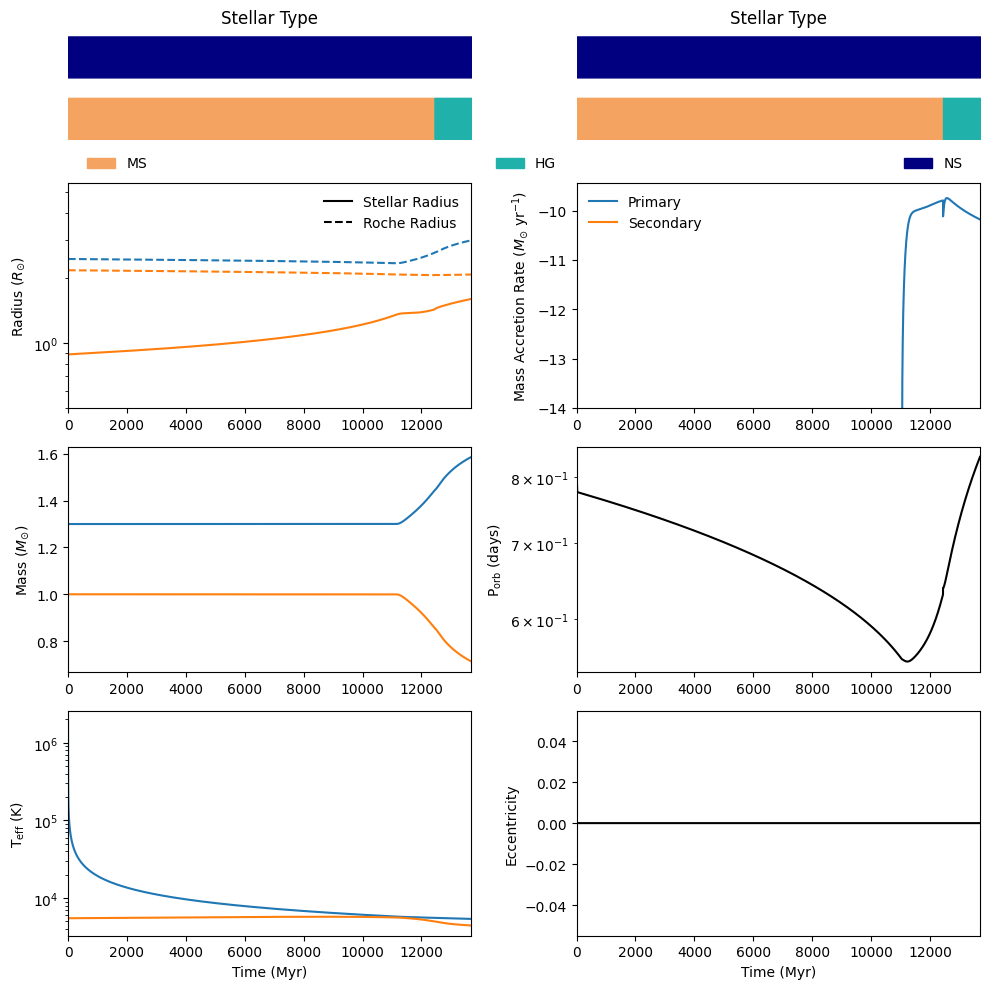

In [9]:
fig = evolve_and_plot(single_binary, t_min=None, t_max=13700., BSEDict=BSEDict, sys_obs={})

[1.44855803e-01 1.08785342e+00 1.52825061e+00 ... 5.07510228e-04
 5.07371139e-04 5.07232264e-04]


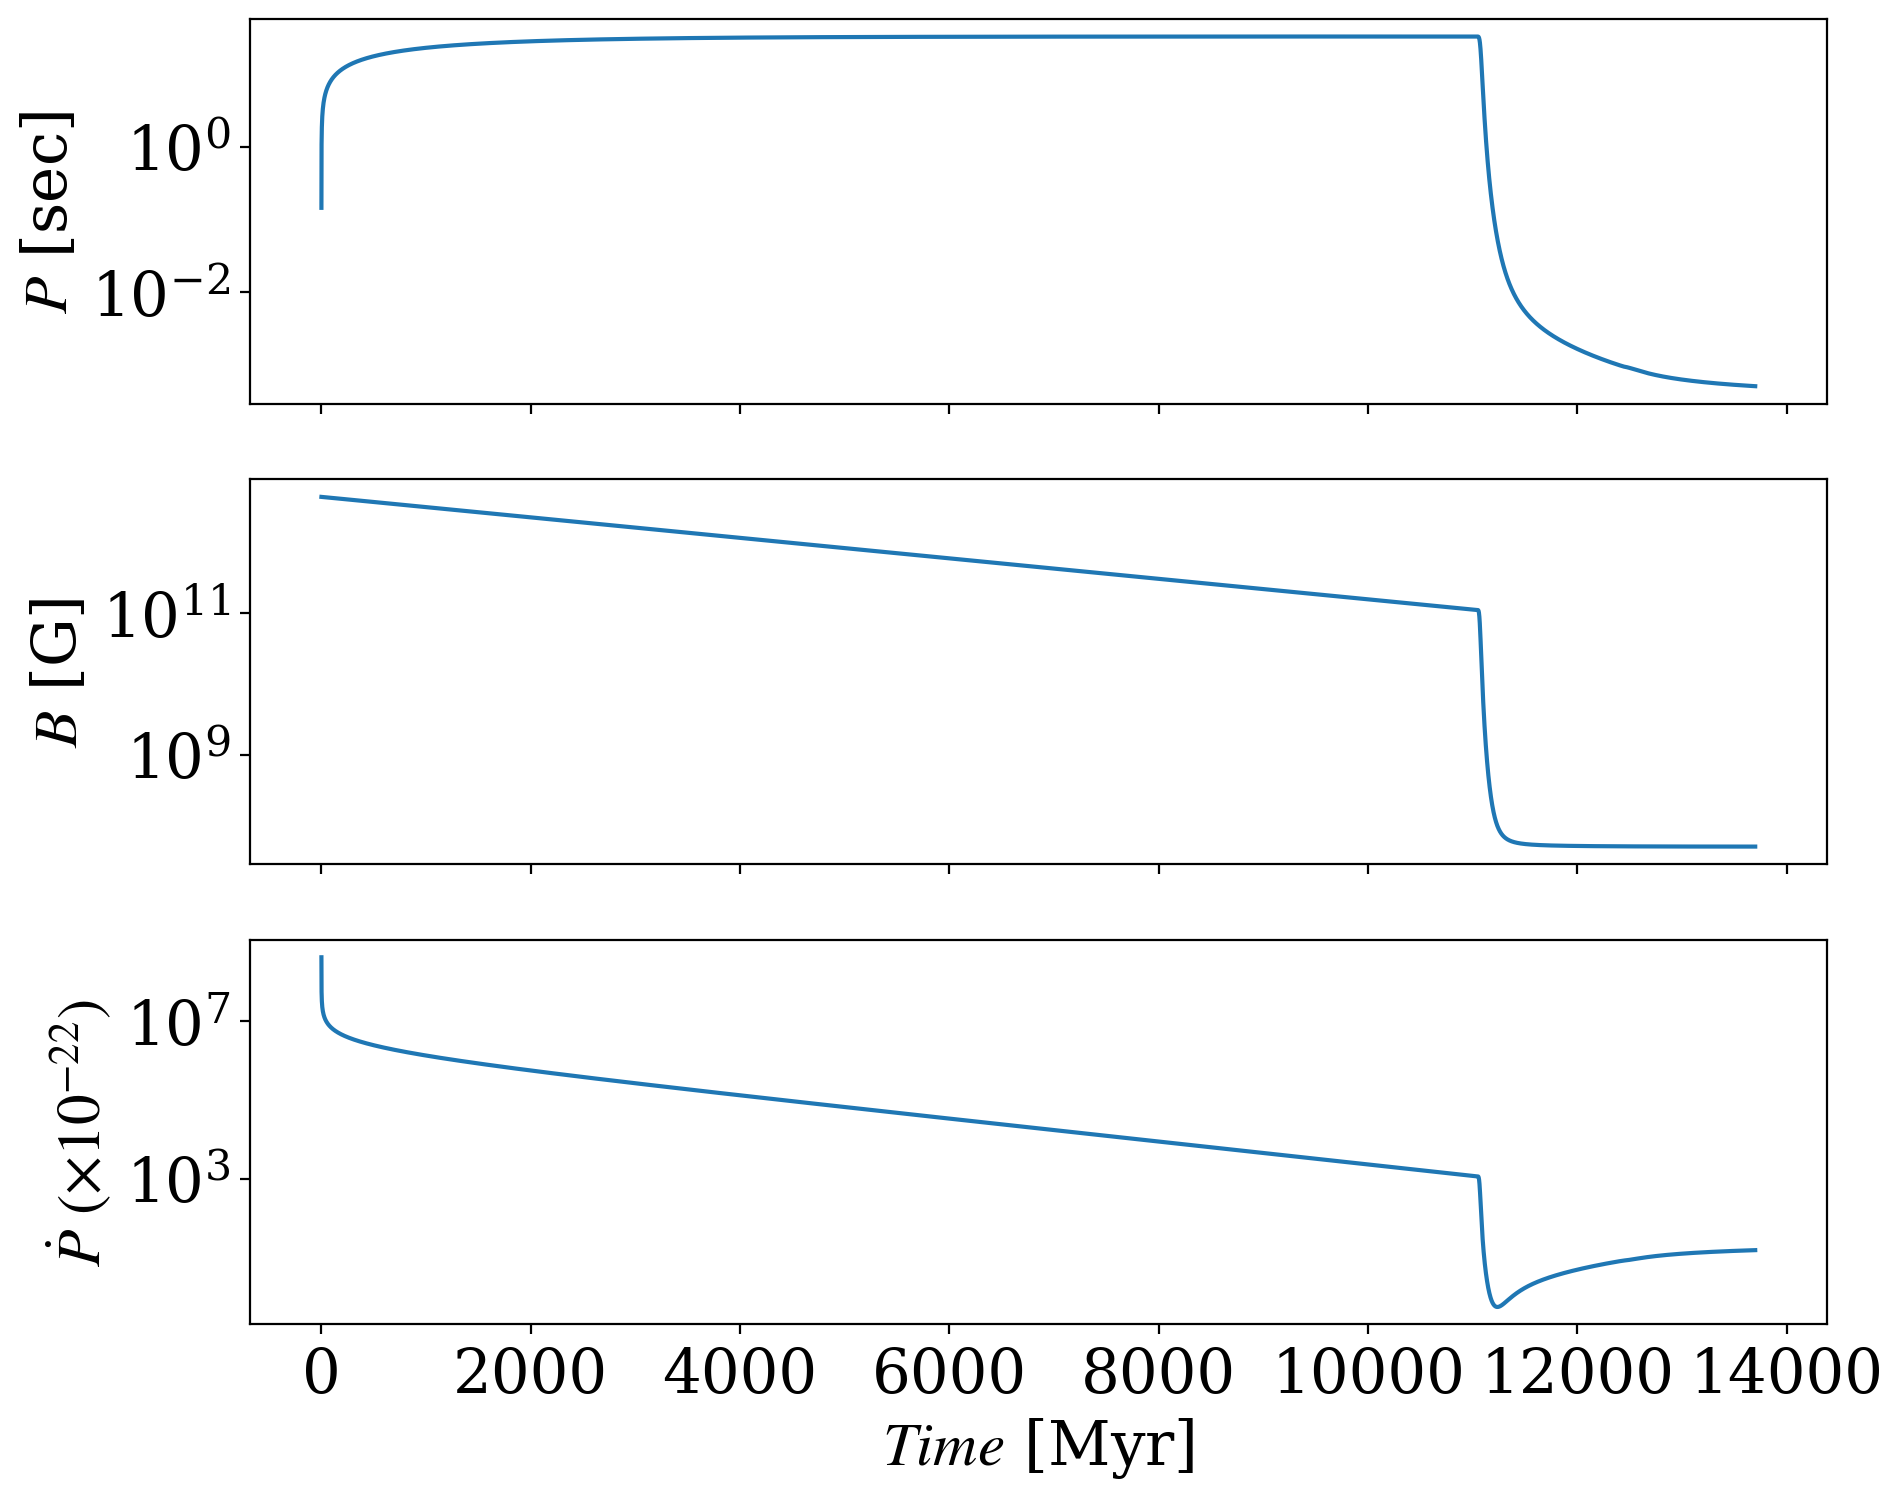

In [35]:
P0 = twopi*yearsc/np.array(bcm.omega_spin_1)
print(P0)
Pdot0=Kconst*yearsc*np.array(bcm.B_1)*np.array(bcm.B_1)/P0*10**19*1000
t_evol = np.array(bcm.tphys)

fig, axs = plt.subplots(nrows = 3, figsize=(10,8), sharex=True)
axs[0].plot(t_evol, P0)
axs[0].set_yscale('log')
axs[0].set_ylabel(r'$P$ [sec]')

axs[1].plot(t_evol, np.array(bcm.B_1))
axs[1].set_yscale('log')
axs[1].set_ylabel(r'$B$ [G]')

axs[2].plot(t_evol, Pdot0)
axs[2].set_yscale('log')
axs[2].set_ylabel(r'$\dot{P}\ (\times 10^{-22})$')
axs[2].set_xlabel(r'$Time$ [Myr]')


fig.tight_layout()

# A small grid of binaries

In [12]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 
           'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 
           'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 
           'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 
           'gamma': -2.0, 'pisn': 45.0, 
           'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 
           'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 
           'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 
           'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 
           'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'dtp': 1.}

In [13]:
m1_grid = [1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.]  ## 8
m2_grid = [1., 1.5, 2., 2.5, 3., 3.5, 4.]  ## 7
porb_grid = [0.6, 1.2, 1.8, 2.4, 3., 3.6, 4.2]  ## 7

m1_runs = []; m2_runs = []; porb_runs = []
for xx in range(len(m1_grid)):
    for yy in range(len(m2_grid)):
        for zz in range(len(porb_grid)):
            m1_runs.append(m1_grid[xx]); m2_runs.append(m2_grid[yy]); porb_runs.append(porb_grid[zz])
            
print(len(m1_runs))
#print(m1_runs, m2_runs, porb_runs)
ecc_runs = list(np.full_like(m1_runs, 0.))
tphysf_runs = list(np.full_like(m1_runs, 13700.0))
kstar1_runs = list(np.full_like(m1_runs, 13))
kstar2_runs = list(np.full_like(m1_runs, 1))
metal_runs = list(np.full_like(m1_runs, 0.02))
#print(kstar1_runs)
    
    
binary_set = InitialBinaryTable.InitialBinaries(m1=m1_runs, m2=m2_runs, 
                                                porb=porb_runs, ecc=ecc_runs, 
                                                tphysf=tphysf_runs, kstar1=kstar1_runs, kstar2=kstar2_runs, 
                                                metallicity=metal_runs)
            
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=binary_set, BSEDict=BSEDict)
print('evolve done')
#bcm.to_csv(savepath+'bcm_13_1_grid.csv.gz', compression='gzip')
bpp.to_csv(savepath+'bpp_13_1_grid.csv')
#print('done')

392


/mnt/raid-cita/claireshiye/opt/anaconda3/envs/cosmic3.4/lib/python3.7/site-packages/cosmic/evolve.py:260: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  "file or the BSEDict.".format(k))


evolve done


In [11]:
print(bcm.loc[0])

KeyError: -1

In [14]:
print(bpp.loc[0])

          tphys    mass_1    mass_2  kstar_1  kstar_2       sep      porb  \
0      0.000000  1.300000  1.000000     13.0      1.0  3.950287  0.600000   
0   6329.898428  1.300000  1.000000     13.0      1.0  2.862376  0.370082   
0  10508.000000  1.554573  0.745427     13.0      0.0  2.557232  0.312510   
0  13700.000000  1.691411  0.608589     13.0      0.0  2.342933  0.274061   

   ecc    RRLO_1    RRLO_2  ...  B_2    bacc_1  bacc_2       tacc_1  tacc_2  \
0  0.0  0.000009  0.627280  ...  0.0  0.000000     0.0     0.000000     0.0   
0  0.0  0.000012  1.000022  ...  0.0  0.000000     0.0     0.000000     0.0   
0  0.0  0.000012  1.032254  ...  0.0  0.254573     0.0  4178.101572     0.0   
0  0.0  0.000013  1.033563  ...  0.0  0.391411     0.0  7370.101572     0.0   

   epoch_1       epoch_2  bhspin_1  bhspin_2  bin_num  
0      0.0      0.000000       0.0       0.0        0  
0      0.0      0.000000       0.0       0.0        0  
0      0.0 -17586.007340       0.0       0.0      